## Community structure and mixing patterns ##

Problem:
- local measures focus on *individual* nodes
- global measures tend to average *equally* across all nodes

To measure "large-scale" structural variations, we need tools that see **structural patterns** between the local and global levels.

A common approach is to "**cluster**" nodes and edges into **groups**, above the level of individual nodes and below the level of the whole network:
- a network cluster is usually called a **community** (or a *module*, or a *compartment*)
- a community is a group of nodes that connect to other groups in **similar** ways 
- the definition is inherently **statistical**:
    - nodes in the same group will follow the same statistical rules for how they connect to other nodes
    - these rules can vary between groups

## Community structure and mixing patterns ##

The variation in group-level connectivity patterns allows us to capture a wide variety of notions of **modular structure** in a network.

<img src="images/modular_structure.png" alt="Two networks with very different modular structures" title="Two networks with very different modular structures" style="width: 500px;"/>

### The mixing matrix of communities ###

We can formalize the notion of community using a **mixing matrix** $\mathcal{M}$:
- $\mathcal{M}$ is a $c \times c$ matrix, where $c$ is the number of communities in the network
- the value of the element $\mathcal{M}_{rs}$ is related to the **frequency** or likelihood that a node in group $r$ connects to a node in group $s$

In the example, a lighter color indicates a greater density of edges (higher likelihood of connection), while a darker color indicates a lower density.
This mixing matrix defines an **assortative** community structure:
- the values along the diagonal $\mathcal{M}_{r=s}$ are higher than the values in the off diagonal $\mathcal{M}_{r\neq s}$
- two nodes with the same group label are more likely to be connected than are two nodes with different labels

<img src="images/mixing_matrix.png" alt="An example of a mixing matrix" title="An example of a mixing matrix" style="width: 500px;"/>

### The mixing matrix of communities ###

We can
- use a specific $\mathcal{M}$ to generate a **random graph** with a particular pattern of group-level interactions
- **infer** the $\mathcal{M}$ that describes the structure of some real-world network

The mixing matrix is a simple **summary** of how a network is organized **at one particular scale**.

If groups all interact with each other in the same way, the scale is irrelevant and $\mathcal{M}=$const. for all $r,s$.
This situation of **homogeneous** mixing is exactly the setting of an Erdos-Renyi random graph!

### The mixing matrix of communities ###

If groups interact differently with each other (and themselves), then we say the mixing is **heterogeneous**.
We are usually interested in the presence of a set of "stylized" modular patterns:
- **assortative** communities: $\mathcal{M}_{rr} > \mathcal{M}_{r\neq s}$
- **disassortative** communities: $\mathcal{M}_{rr} < \mathcal{M}_{r\neq s}$
- **ordered** communities: $\mathcal{M}_{rr} > \mathcal{M}_{r,r+1} > \mathcal{M}_{r,r+l}$ for $l\geq 2$, i.e., edges occur mainly within groups or between "consecutive" groups in a linear ordering
- **core-periphery** structure: edges occur mainly within a relatively dense "core" community, surrounded by successively sparser peripheral layers

### The mixing matrix of communities ###


<img src="images/structure_types.png" alt="Main types of structural mixing" title="Main types of structural mixing" style="width: 800px;"/>

### Mixing structures ###

The scale is very important:
- as $c$ increases, the range of patterns and combinations of patterns also increases
- theoretical and empirical analyses suggest that for most networks $c \approx \sqrt{m}$ works well
- few real-world networks exhibit "clean" stylized patterns: in the figure, a political blogs network having a clear assortative community structure for $c=2$ (left), but also a core-periphery pattern within each of these 2 communities, visible with $c=4$ (right) 

<img src="images/2_to_4.png" alt="Different mixing scales" title="Different mixing scales" style="width: 600px;"/>

### Mixing structures ###


**Ordered** patterns are more prevalent in social networks:
- social interactions tend to be ordered by age:
    - most people interact with others who are within 5 years of their own age
    - they interact at slightly lower rates for people within 5–10 years of their age
- exceptions to this pattern are children-parents and children-grandparents interactions
This "age-structured" pattern is key in modern epidemiological modeling.

<img src="images/social_mixing.png" alt="Example of ordered mixing in social networks" title="Example of ordered mixing in social networks" style="width: 600px;"/>

### Hierarchical mixing ###

Community structure can be generalized to **hierarchical community structure**:
- vertices divide into groups that further subdivide into groups of groups, and so forth over multiple scales
- a hierarchy spans all the scales between the local and global levels
- a *dendrogram* or a tree can be used to see how smaller groups are nested within larger groups
- taking a "slice" across the dendrogram induces a single decomposition of the network into communities
- two nodes that are "close" on the tree are more likely to be connected

### Hierarchical mixing ###

Hierarchies are typical in human social structures and thus occur in their network representation.
For instance: classes, departments, universities, etc.

<img src="images/hierarchical_mixing.png" alt="Examples of hierarchical mixing" title="Examples of hierarchical mixing" style="width: 600px;"/>

### Modularity ###

Let $x_i\in S$ be some **categorical** vertex attribute.
We might want to assess whether $x$ mixes assortativity, i.e., occurs at either end of an edge *surprisingly often*. 
The **modularity** $Q$ is a measure of assortativity that answers the question:
> How much *more often* do attributes match across edges than *expected* at random?

This definition relies on the existence of some **null model** for mixing at random: $Q$ is the total difference between the *observed* and *expected* fractions of edges for the $S \times S$ pairs of types.
- $Q > 0$ means assortative mixing
- $Q = 0$ may happen because 
    - $x_i=x$ for all vertices $i$ -- not interesting!
    - attributes match *no* more or less frequently than we would expect at random

### Modularity ###

Selecting the right null model is **fundamental**!
Consider a network with $qn$ blue vertices and $(1-q)n$ red vertices:
- under the Erdos-Renyi model, we expect $q^2m$ edges within the blue vertices, $(1-q)^2m$ edges within the red vertices and $2q(1-q)m$ edges connecting a blue and a red vertex, but the ER model produces thin-tailed degree distributions
- what if red vertices tend to be high-degree vertices? this will make the likelihood of red-red edges much greater and that of blue-blue much smaller

### The configuration model ###

The **configuration** model defines a random graph with a specified degree structure: instead of setting the density of edges $p$ (or, equivalently, the mean degree $\langle k\rangle$), we fix the **entire degree sequence** $\vec{k}$ of a random graph.

A similar model is the **Chung-Lu** model, where the specified degree is only a node's **expected** degree, with some Poisson variation around that value.

In both cases, the result is a graph where, with good approximation, $\Pr(A_{ij}=A_{ji}=1) \propto k_ik_j$ for all $i<j$, where $k_i$ is the *desired* degree of vertex $i$.

- the Erdos-Renyi model allows us to test whether some descriptive statistic's value can be explained by the **density** of edges **alone** (plus randomness)
- the configuration model lets us say whether or not it can be explained by the **degree distribution** alone (plus randomness)

the ZK graph (left) and the equivalent CM graph (right):


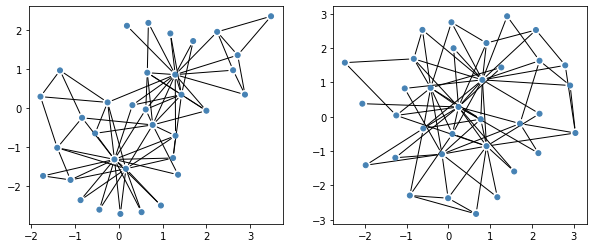

In [1]:
import igraph
import matplotlib.pyplot as plt

ZK = igraph.Graph.Famous('Zachary')
CM = igraph.Graph.Degree_Sequence(ZK.degree(), method='vl')

print('the ZK graph (left) and the equivalent CM graph (right):')
fig = plt.figure(figsize=(10,4))
ax = fig.subplots(nrows=1, ncols=2)
vs = {"bbox":(300,300), "margin":20}
igraph.plot(ZK, **vs, target=ax[0])
igraph.plot(CM, **vs, target=ax[1])

### Modularity ###

Given a labeling of vertices $\vec{x}$, the modularity for an undirected network is

$$Q = \frac{1}{2m} \sum_{ij} \left(A_{ij}-\frac{k_ik_j}{2m}\right) \delta(x_i,x_j)$$

where: $k_i$ is the degree of vertex $i$; $\delta(x_i,x_j)=1$ if $x_i=x_j$, 0 otherwise ($\delta$ is the *Kronecker delta function*).

- through $\delta$, the sum is over all pairs of vertices $i, j$ with $x_i=x_j$
- the inner term is the difference between:
    - the *observed* fraction of all edges between $i$ and $j$: $A_{ij}/2m$
    - its *expected* value under the equivalent **configuration model**, i.e., a random graph with the same degree distribution

### Modularity ###

$Q$ can be rewritten as

$$Q = \sum_{u} \left(e_{uu}-a_u^2\right)$$

where $e_{uu}$ is the observed fraction of edges that join vertices with label $u$, while $a_u$ is the fraction of "ends of edges" that are attached to vertices with label $u$, so that $a_u^2$ is the expected density of edges that join vertices with label $u$ under the configuration model.
This expression for $Q$ only requires a matrix containing the number of connections between each pair of vertex types.

In the figure below, can you verify that $Q = 5/14 = 0.357$ for the left labeling, whereas $Q = 6/49 = 0.122$ for the right labeling?
Why is the modularity greater for the left case?

<img src="images/modularity_example.png" alt="Two examples for the computation of Q" title="Two examples for the computation of Q" style="width: 600px;"/>

### Assortativity coefficient ###

Let $x_i$ be some **scalar** attribute of vertex $i$.
In this case, assessing whether $x$ mixes assortatively means to check whether any two adjacent vertices tend to have a *similar* value for $x$.

The **assortativity coefficient**, a network-based generalization of the Pearson correlation coefficient, answers
the question:
> How much *more similar* are attributes across edges than *expected* at random? 

### Assortativity coefficient ###

The assortativity coefficient is adapted from the standard expression of covariance, where the mean value observed at either end of an edge is $\mu = (1/2m)\sum_i k_ix_i$:

$$ r = \frac{\mathrm{cov}(\vec{x},A)}{\mathrm{var}(\vec{x})}$$
where
$$\mathrm{cov}(\vec{x},A) = \frac{\sum_{ij} A_{ij}(x_i-\mu)(x_j-\mu)}{\sum_{ij}A_{ij}} = \frac{1}{2m} \sum_{ij}\left(A_{ij}-\frac{k_ik_j}{2m}\right)x_ix_j$$
(the expression for $\mathrm{cov}(\vec{x},A)$ is remarkably similar to $Q$!)

$r\in [-1,1]$ and:
- if $r>0$, we have **assortative** mixing
- if $r<0$, we have **disassortative** mixing

### Degree assortativity ###

A widely studied example of the assortativity coefficient is the **degree assortativity**, corresponding to $x_i=k_i$:
- **assortative mixing by degree** produces a network in which the high-degree vertices tend to connect to each other in dense, high-degree core, while the low-degree vertices also connect to each other, producing a sparse, low-degree periphery; in these networks, degree correlates with centrality
- **disassortative mixing by degree** produces a network in which the high-degree vertices tend to connect to low-degree vertices, producing star-like structures; in these networks, centrality correlates less strongly with degree

In [2]:
print('the degree assortativity of ZK is:', ZK.assortativity_degree())

the degree assortativity of ZK is: -0.47561309768461424


## Detecting community structure ###

The process of decomposing a particular network $G$ into "clusters" of nodes is called **community detection**.
- The input to community detection is always a network, its nodes and their connections.
In some cases, we can also use various forms of *auxiliary* information, e.g., node attributes or edge weights, to produce a better decomposition.
- The output is always a partition $\vec{z}$ of $G$, i.e., a labeling of nodes that says to which community each node belongs. Given $\vec{z}$, we can derive a community mixing matrix $\mathcal{M}$ that tells us how these communities fit together to construct the whole.

<img src="images/community_detection.png" alt="An example of community detection" title="An example of community detection" style="width: 600px;"/>

### Community detection algorithms ###

There are *many* different algorithms for community detection, taking very different approaches:
- **spectral clustering** interprets (some variant of ) the adjacency matrix as a similarity matrix and uses a standard clustering method on its *relevant* eigenvectors 
- **modularity maximization** selected the partition that maximizes the modularity function $Q$
- **random walk** based methods rely in the assumption that a random walker on $G$ will be often *trapped* into a community
- **InfoMap** relies on concepts from information theory to find the partition that allows to optimally compress the information needed to describe the movement of a random walker on $G$

Most techniques implicitly or explicitly search for **assortative** community structure, i.e., they assume that a good partition is a partition where intra-community connections are more frequent than inter-community connections.

A desirable property for a community detection algorithm is its ability to **automatically** choose the number of groups $c$.

### Community detection algorithms ###

Ghasemian *et al.* (2019) compared the results of applying 16 popular community detection algorithms to 572 real-world networks.

Key takeaway 1: even on the same data, different algorithms can find both **substantially different communities** and **very different numbers of communities**. 

<img src="images/detection_comparison.png" alt="Community detection for 16 different algorithms" title="Community detection for 16 different algorithms" style="width: 650px;"/>

### Community detection algorithms ###

Ghasemian *et al.* (2019) compared the results of applying 16 popular community detection algorithms to 572 real-world networks.

Key takeaway 2: **similar algorithms** give **similar communities**.

In the figure, the pairwise similarity of the resulting network partition $\vec{z}$, organized using a hierarchical clustering algorithm.

<img src="images/detection_comparison_2.png" alt="Community detection for 16 different algorithms" title="Community detection for 16 different algorithms" style="width: 500px;"/>

### Caveats and limitations of community detection ###

Community detection is the network analog of clustering data in a vector space, and, similarly, it **cannot** be solved universally:
- which clustering is optimal depends on what we intend to do with it later
- good community detection methods can be powerful tools for exploratory data analysis or to test specific network hypotheses
- yet, the particular output of any algorithm should not ne interpreted as the *real* modular structure of the network

the communities of the ZK graph with the Louvain (modularity-based, left) and the walktrap (random-walk-based, right) algorithsm:


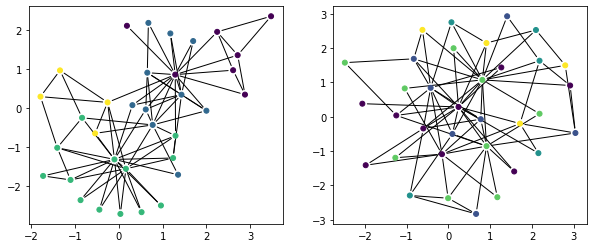

In [3]:
ZK_louvain = ZK.community_multilevel()
ZK_walktrap = ZK.community_walktrap().as_clustering()

print('the communities of the ZK graph with the Louvain (modularity-based, left) and the walktrap (random-walk-based, right) algorithsm:')
fig = plt.figure(figsize=(10,4))
ax = fig.subplots(nrows=1, ncols=2)
vs = {"bbox":(300,300), "margin":20}
vs['vertex_color']=ZK_louvain.membership
igraph.plot(ZK, **vs, target=ax[0])
vs['vertex_color']=ZK_walktrap.membership
igraph.plot(CM, **vs, target=ax[1])

the communities of the EN graph with the Louvain (modularity-based, left) and the walktrap (random-walk-based, right) algorithsm:


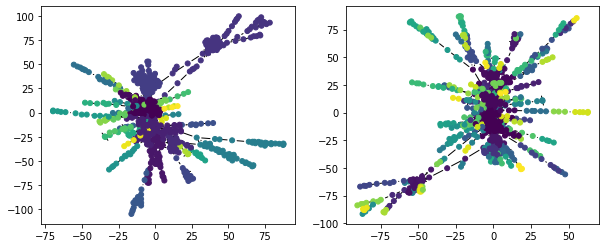

In [4]:
import pandas as pd
import igraph
df = pd.read_csv('EN/edges.csv', header=0, names=['source','target','weight','color'])
EN = igraph.Graph.TupleList(df[['source','target']].itertuples(index=False), edge_attrs="weight")

EN_louvain = EN.community_multilevel()
EN_walktrap = EN.community_walktrap().as_clustering()

print('the communities of the EN graph with the Louvain (modularity-based, left) and the walktrap (random-walk-based, right) algorithsm:')
fig = plt.figure(figsize=(10,4))
ax = fig.subplots(nrows=1, ncols=2)
vs = {"bbox":(300,300), "margin":20}
vs['vertex_color']=EN_louvain.membership
igraph.plot(EN, **vs, target=ax[0])
vs['vertex_color']=EN_walktrap.membership
igraph.plot(EN, **vs, target=ax[1])